## **1. Image Filtering**

### **Image patches (8 Pts)**

1. (5 pts) Take the image ’grace hopper.png’, load it as grayscale, and divide the image into 16 by 16 pixel image patches. Normalize each patch to have zero mean and unit variance. Complete the function image patches in filters.py. Plot three of the 16x16 image patches in your report.


(389, 600)


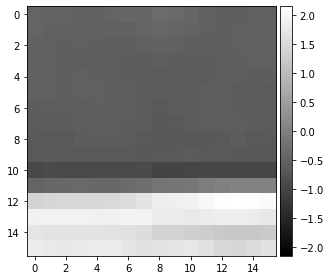

In [49]:
from skimage import color
from skimage import io
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

patch_length = 16
patch_heigth = 16

image = color.rgb2gray(io.imread('/content/sample_data/grace_hopper.png'))
list_patches = []
print(image.shape)
for i in range(0,383,patch_length):
    for j in range(0,591,patch_heigth):
        list_patches.append(image[i:i+patch_length,j:j+patch_heigth])
list_patches = np.array(list_patches)
normalized = (list_patches-np.mean(list_patches,axis=1,keepdims=True))/np.std(list_patches,axis=1,keepdims=True)
io.imshow(normalized[12],cmap='gray')
#io.imshow(normalized[2],cmap='gray')
#io.imshow(normalized[3],cmap='gray')

2. (3 pts) Early work in computer vision used unique images patches as descriptors or features of images
for applications ranging from image alignment and stitching to object classification and detection.
Inspect the patches extracted in the previous question, and discuss, in a few sentences, why they
would be good or bad descriptors. Consider how those patches would look like if we changed the
object’s pose, scale, illumination, etc.
(INCLUDED IN THE REPORT)

### **Gaussian Filter [16 pts]**

1. (5 pts) For a 2D Gaussian filter with a given variance σ
2
, the convolution can be reduced by sequential
operations of a 1D kernel. Prove that a convolution by a 2D Gaussian filter is equivalent to sequential
convolutions of a vertical and a horizontal 1D Gaussian filter. Specify the relationship between the
2D and 1D Gaussian filter, especially the relationship between their variances. [INCLUDED IN REPORT]

2. (4 pts) Take the image ’grace hopper.png’ as the input. Complete the function convolve()
and other related parts in filters.py. Use a Gaussian kernel with size 3 × 3 and σ
2 ≈
1
2 ln 2 . Plot
the output images in your report. Describe what Gaussian filtering does to the image in one sentence.
Be sure to implement convolution and not cross-correlation.

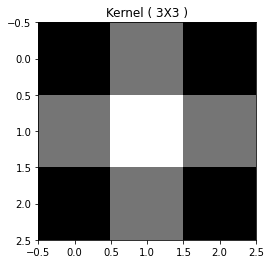

Found 3 Channels : (389, 600, 3)
Converted to Gray Channel. Size : (389, 600)
Kernel Shape : (3, 3)
Output Image size : (389, 600)


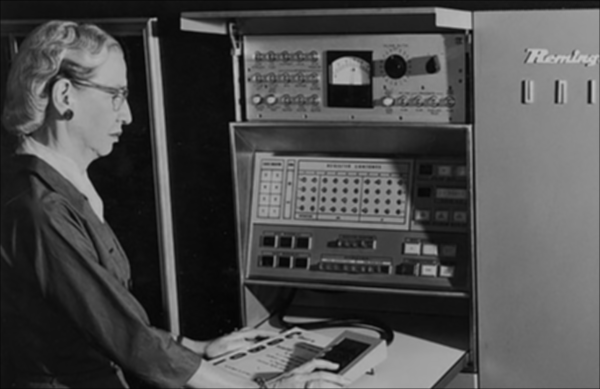

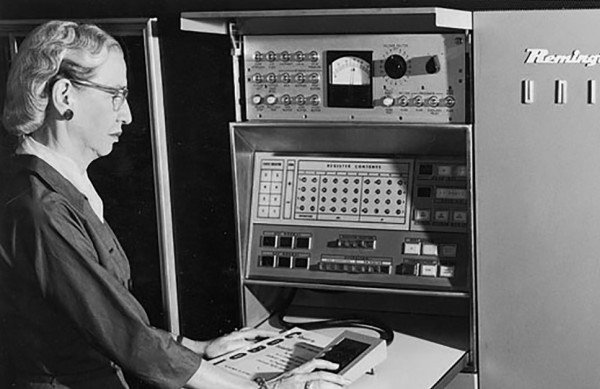

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    return output

def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
def gaussian_kernel(size, sigma=0.848, verbose=True):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.show()
    return kernel_2D
 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))
    return convolution(image, kernel, average=True)

image = cv2.imread('/content/sample_data/grace_hopper.png')
im=gaussian_blur(image, 3, verbose=True)
cv2.imwrite('/content/sample_data/grace_hopper_gauss.png',im)
cv2_imshow(image)

3. (3 pts) Consider the image as a function I(x, y) and I : R 2 → R. When working on edge detection,
we often pay a lot of attention to the derivatives. Denote the derivatives. [INLCUDED IN REPORT]

4. (4 pts) Use the original image and the Gaussian-filtered image as inputs respectively. Plot both outputs
in your report. Discuss the difference between the two images in no more than three sentences.

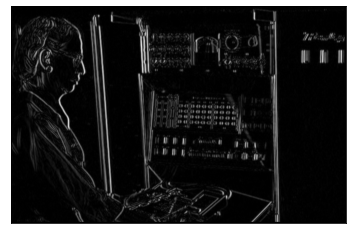

In [ ]:

import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

image = cv2.imread('/content/sample_data/grace_hopper_gauss.png',0)

kx = np.array([[-1/2, 0, 1/2]], dtype = np.float)
ky = np.array([[-1/2, 0, 1/2]], dtype = np.float).T
N = image.shape[0] #row 
M = image.shape[1] #column
row = N
column = M
kxImage = np.zeros((row,column))
kyImage = np.zeros((row,column))
Grad = np.zeros((row,column))

#Surrounds array with 0's on the outside perimeter
image = np.pad(image, (1,1), 'edge')

for i in range(1, N-1):
    for j in range(1, M-1):        
        #Calculate gx and gy using Sobel (horizontal and vertical gradients)
        gx = (kx[0][0] * image[i-1][j-1]) + (kx[0][1] * image[i-1][j]) + (kx[0][2] * image[i-1][j+1])
        gy = (ky[0][0] * image[i-1][j-1]) + (ky[0][1] * image[i-1][j]) + (ky[0][2] * image[i-1][j+1])   

        kxImage[i-1][j-1] = gx
        kyImage[i-1][j-1] = gy

        #Calculate the gradient magnitude
        g = np.sqrt(gx * gx + gy * gy)
        Grad[i-1][j-1] = g

plt.figure('2D Convolution Gradient')
plt.imshow(Grad, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([])
plt.show()

## **2.Feature Extraction**

### 2.1 Corner Score

In [ ]:
import sys
from PIL import Image

def draw_point(image, x, y, radius = 1):
    for dx in range(-radius, radius + 1):
        for dy in range(-radius, radius + 1):
            image.putpixel((x+dx, y+dy), 255)

def draw_corners(image, corners_map):
    for corner in corners_map:
        draw_point(image, corner[0], corner[1])

def moravec(image, threshold = 100):

    corners = []
    xy_shifts = [(1, 0), (1, 1), (0, 1), (-1, 1)]

    for y in range(1, image.size[1]-1):
        for x in range(1, image.size[0]-1):
            for shift in xy_shifts:
                diff = image.getpixel((x + shift[0], y + shift[1]))
                diff = diff - image.getpixel((x, y))
                diff = diff * diff
                if diff < E:
                    E = diff
            if E > threshold:
                corners.append((x, y))

    return corners

image = Image.open('/content/sample_data/grace_hopper.png').convert("L")
corners = moravec(image, threshold)
draw_corners(image, corners)

### 2.2 Sobel Operator

1. Some proof [INCLUDED IN REPORT]

 2. Take image....

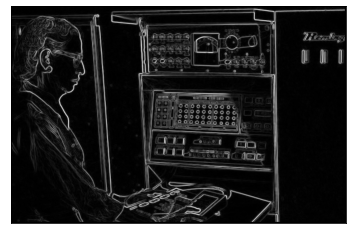

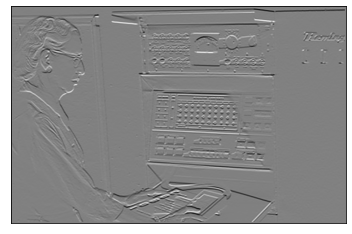

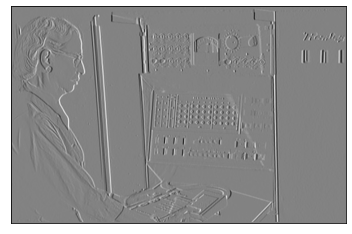

In [ ]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

image = cv2.imread('/content/sample_data/grace_hopper.png',0)

sobelx = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]], dtype = np.float)
sobely = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]], dtype = np.float)
N = image.shape[0] #row 
M = image.shape[1] #column
row = N
column = M
sobelxImage = np.zeros((row,column))
sobelyImage = np.zeros((row,column))
sobelGrad = np.zeros((row,column))

#Surrounds array with 0's on the outside perimeter
image = np.pad(image, (1,1), 'edge')

for i in range(1, N-1):
    for j in range(1, M-1):        
        #Calculate gx and gy using Sobel (horizontal and vertical gradients)
        gx = (sobelx[0][0] * image[i-1][j-1]) + (sobelx[0][1] * image[i-1][j]) + \
             (sobelx[0][2] * image[i-1][j+1]) + (sobelx[1][0] * image[i][j-1]) + \
             (sobelx[1][1] * image[i][j]) + (sobelx[1][2] * image[i][j+1]) + \
             (sobelx[2][0] * image[i+1][j-1]) + (sobelx[2][1] * image[i+1][j]) + \
             (sobelx[2][2] * image[i+1][j+1])

        gy = (sobely[0][0] * image[i-1][j-1]) + (sobely[0][1] * image[i-1][j]) + \
             (sobely[0][2] * image[i-1][j+1]) + (sobely[1][0] * image[i][j-1]) + \
             (sobely[1][1] * image[i][j]) + (sobely[1][2] * image[i][j+1]) + \
             (sobely[2][0] * image[i+1][j-1]) + (sobely[2][1] * image[i+1][j]) + \
             (sobely[2][2] * image[i+1][j+1])     

        sobelxImage[i-1][j-1] = gx
        sobelyImage[i-1][j-1] = gy

        #Calculate the gradient magnitude
        g = np.sqrt(gx * gx + gy * gy)
        sobelGrad[i-1][j-1] = g

plt.figure('2D Convolution Gradient')
plt.imshow(sobelGrad, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes

plt.figure('2D Convolution Gy')
plt.imshow(sobelyImage, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes

plt.figure('2D Convolution Gx')
plt.imshow(sobelxImage, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes

plt.show()
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gx.png',sobelxImage) 
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gy.png',sobelyImage)
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gradient.png',sobelGrad)

### 3. Steerable Filter

a) Derive

b) Plot output img

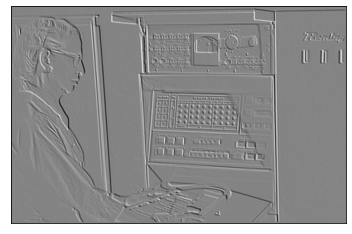

In [ ]:

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

image = cv2.imread('/content/sample_data/grace_hopper.png',0)

sobelx = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]], dtype = np.float)
sobely = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]], dtype = np.float)
N = image.shape[0] #row 
M = image.shape[1] #column
row = N
column = M
sobelxImage = np.zeros((row,column))
sobelyImage = np.zeros((row,column))
sobelGrad = np.zeros((row,column))

angles=[0,(math.pi/6),(math.pi/3),(math.pi/6),2*(math.pi/3),5*(math.pi/6)]
#Surrounds array with 0's on the outside perimeter
image = np.pad(image, (1,1), 'edge')

for i in range(1, N-1):
    for j in range(1, M-1):        
        #Calculate gx and gy using Sobel (horizontal and vertical gradients)
        gx = (sobelx[0][0] * image[i-1][j-1]) + (sobelx[0][1] * image[i-1][j]) + \
             (sobelx[0][2] * image[i-1][j+1]) + (sobelx[1][0] * image[i][j-1]) + \
             (sobelx[1][1] * image[i][j]) + (sobelx[1][2] * image[i][j+1]) + \
             (sobelx[2][0] * image[i+1][j-1]) + (sobelx[2][1] * image[i+1][j]) + \
             (sobelx[2][2] * image[i+1][j+1])

        gy = (sobely[0][0] * image[i-1][j-1]) + (sobely[0][1] * image[i-1][j]) + \
             (sobely[0][2] * image[i-1][j+1]) + (sobely[1][0] * image[i][j-1]) + \
             (sobely[1][1] * image[i][j]) + (sobely[1][2] * image[i][j+1]) + \
             (sobely[2][0] * image[i+1][j-1]) + (sobely[2][1] * image[i+1][j]) + \
             (sobely[2][2] * image[i+1][j+1])     

        sobelxImage[i-1][j-1] = gx*(math.cos(5*(math.pi/6)))
        sobelyImage[i-1][j-1] = gy*(math.sin(5*(math.pi/6)))

        #Calculate the gradient magnitude
        g = sobelxImage[i-1][j-1] + sobelyImage[i-1][j-1]
        sobelGrad[i-1][j-1] = g

plt.figure('2D Convolution Gradient')
plt.imshow(sobelGrad, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes
'''
plt.figure('2D Convolution Gy')
plt.imshow(sobelyImage, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes

plt.figure('2D Convolution Gx')
plt.imshow(sobelxImage, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes
'''
plt.show()
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gx.png',sobelxImage) 
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gy.png',sobelyImage)
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gradient.png',sobelGrad)

c) Discuss [INCLUDED IN REPORT]

### 2.3 LoG Filter

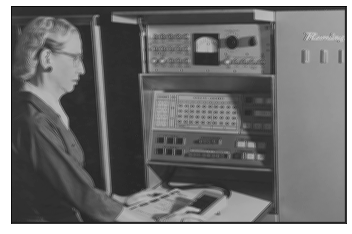

In [60]:

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

image = cv2.imread('/content/sample_data/grace_hopper.png',0)

kernel_LoG1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype = np.float)
'''
kernel_LoG2 = np.array([
        [0, 0, 3, 2, 2, 2, 3, 0, 0],
        [0, 2, 3, 5, 5, 5, 3, 2, 0],
        [3, 3, 5, 3, 0, 3, 5, 3, 3],
        [2, 5, 3, -12, -23, -12, 3, 5, 2],
        [2, 5, 0, -23, -40, -23, 0, 5, 2],
        [2, 5, 3, -12, -23, -12, 3, 5, 2],
        [3, 3, 5, 3, 0, 3, 5, 3, 3],
        [0, 2, 3, 5, 5, 5, 3, 2, 0],
        [0, 0, 3, 2, 2, 2, 3, 0, 0]
    ], dtype = np.float)
'''

N = image.shape[0] #row 
M = image.shape[1] #column
row = N
column = M
sobelGrad = np.zeros((row,column))

image = np.pad(image, (1,1), 'edge')

for i in range(1, N-1):
    for j in range(1, M-1):        
        #Calculate gx and gy using Sobel (horizontal and vertical gradients)
        g = (kernel_LoG1[0][0] * image[i-1][j-1]) + (kernel_LoG1[0][1] * image[i-1][j]) + \
             (kernel_LoG1[0][2] * image[i-1][j+1]) + (kernel_LoG1[1][0] * image[i][j-1]) + \
             (kernel_LoG1[1][1] * image[i][j]) + (kernel_LoG1[1][2] * image[i][j+1]) + \
             (kernel_LoG1[2][0] * image[i+1][j-1]) + (kernel_LoG1[2][1] * image[i+1][j]) + \
             (kernel_LoG1[2][2] * image[i+1][j+1])

        sobelGrad[i-1][j-1] = g

plt.figure('2D Convolution Gradient')
plt.imshow(sobelGrad, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes
'''
plt.figure('2D Convolution Gy')
plt.imshow(sobelyImage, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes

plt.figure('2D Convolution Gx')
plt.imshow(sobelxImage, cmap=plt.cm.gray)   
plt.xticks([]), plt.yticks([]) #rids axes
'''
plt.show()
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gx.png',sobelxImage) 
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gy.png',sobelyImage)
#cv2.imwrite('/content/sample_data/custom_2d_convolution_gradient.png',sobelGrad)

### 2.2 Harris Corner Detector

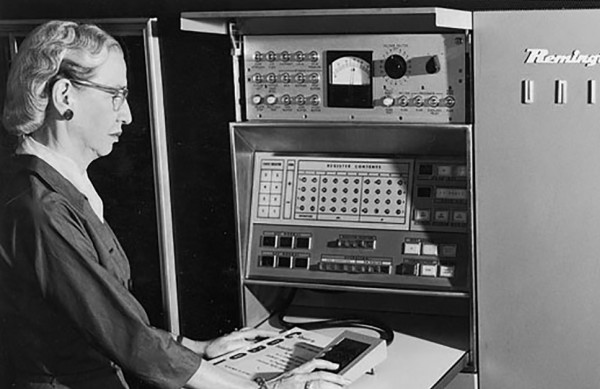

Detecting Corners Started!


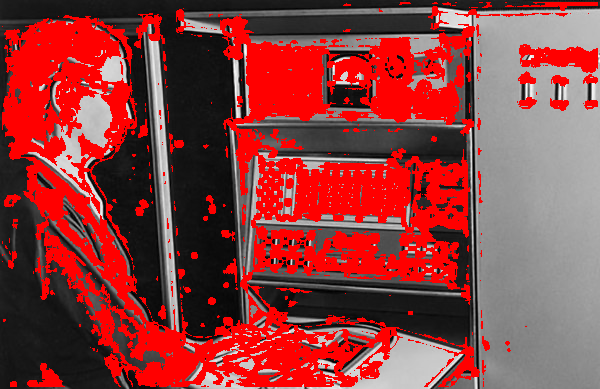

Detecting Corners Complete!


In [ ]:
import argparse
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_harris_corners(input_img, k, window_size, threshold):
    
    corner_list = []
    output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
    
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset
    
    
    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            
            #Values of sliding window
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
            #The variable names are representative to 
            #the variable of the Harris corner equation
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
            #Sum of squares of intensities of partial derevatives 
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Calculate determinant and trace of the matrix
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            
            #Calculate r for Harris Corner equation
            r = det - k*(trace**2)

            if r > threshold:
                corner_list.append([x, y, r])
                output_img[y,x] = (0,0,255)
    
    return corner_list, output_img 

def main():

    k = 0.04
    window_size = 5
    threshold = 10000.00
    input_img = cv2.imread('/content/sample_data/grace_hopper.png', 0)
    
    cv2_imshow(input_img)
    cv2.waitKey(0)

    if input_img is not None:
        
        print ("Detecting Corners Started!")
        corner_list, corner_img = find_harris_corners(input_img, k, window_size, threshold)
        
        cv2_imshow(corner_img)
        cv2.waitKey(0)
        
        corner_file = open('corners_list.txt', 'w')
        corner_file.write('x ,\t y, \t r \n')
        for i in range(len(corner_list)):
            corner_file.write(str(corner_list[i][0]) + ' , ' + str(corner_list[i][1]) + ' , ' + str(corner_list[i][2]) + '\n')
        corner_file.close()
        
        if corner_img is not None:
            cv2.imwrite("corners_img.png", corner_img)
    else:
        print ("Error in input image!")
            
    print ("Detecting Corners Complete!")



if __name__ == "__main__":
    main()

## **3. Blob Detection**

### 1. Single-scale Blob Detection

In [5]:

   
"""
Implementation of gaussian filter algorithm
"""
from itertools import product
from google.colab.patches import cv2_imshow
from cv2 import COLOR_BGR2GRAY, cvtColor, imread, imshow, waitKey
from numpy import dot, exp, mgrid, pi, ravel, square, uint8, zeros


def gen_gaussian_kernel(k_size, sigma):
    center = k_size // 2
    x, y = mgrid[0 - center : k_size - center, 0 - center : k_size - center]
    g = 1 / (2 * pi * sigma) * exp(-(square(x) + square(y)) / (2 * square(sigma)))
    return g


def gaussian_filter(image, k_size, sigma):
    height, width = image.shape[0], image.shape[1]
    # dst image height and width
    dst_height = height - k_size + 1
    dst_width = width - k_size + 1

    # im2col, turn the k_size*k_size pixels into a row and np.vstack all rows
    image_array = zeros((dst_height * dst_width, k_size * k_size))
    row = 0
    for i, j in product(range(dst_height), range(dst_width)):
        window = ravel(image[i : i + k_size, j : j + k_size])
        image_array[row, :] = window
        row += 1

    #  turn the kernel into shape(k*k, 1)
    gaussian_kernel = gen_gaussian_kernel(k_size, sigma)
    filter_array = ravel(gaussian_kernel)

    # reshape and get the dst image
    dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

    return dst

'''
if __name__ == "__main__":
    # read original image
    img = imread('/content/sample_data/grace_hopper.png')
    # turn image in gray scale value
    gray = cvtColor(img, COLOR_BGR2GRAY)

    # get values with two different mask size
    gaussian3x3 = gaussian_filter(gray, 3, sigma=1)
    gaussian5x5 = gaussian_filter(gray, 5, sigma=0.8)

    # show result images
    cv2_imshow(gaussian3x3)
    cv2_imshow(gaussian5x5)
    waitKey()
'''

'\nif __name__ == "__main__":\n    # read original image\n    img = imread(\'/content/sample_data/grace_hopper.png\')\n    # turn image in gray scale value\n    gray = cvtColor(img, COLOR_BGR2GRAY)\n\n    # get values with two different mask size\n    gaussian3x3 = gaussian_filter(gray, 3, sigma=1)\n    gaussian5x5 = gaussian_filter(gray, 5, sigma=0.8)\n\n    # show result images\n    cv2_imshow(gaussian3x3)\n    cv2_imshow(gaussian5x5)\n    waitKey()\n'

Detect small polka dots
Detect large polka dots


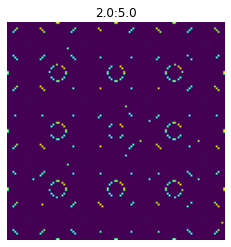

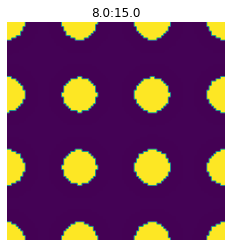

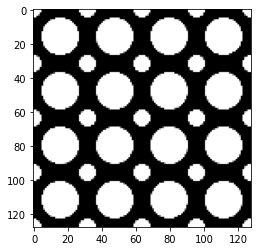

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io

def find_maxima(scale_space, k_xy=5, k_s=1):
    # Extract the peak x,y locations from scale space
    # Input-    scale_space: Scale space of size HxWxS
    #           k: neighborhood in x and y 
    #           ks: neighborhood in scale
    # Output-   list of (x,y) tuples; x<W and y<H
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 

    H,W,S = scale_space.shape
    maxima = []
    for i in range(H):
        for j in range(W):
            for s in range(S):
                # extracts a local neighborhood of max size (2k_xy+1, 2k_xy+1, 2k_s+1)
                neighbors = scale_space[max(0, i-k_xy):min(i+k_xy,H), 
                                        max(0, j-k_xy):min(j+k_xy,W), 
                                        max(0, s-k_s) :min(s+k_s,S)]
                mid_pixel = scale_space[i,j,s]
                num_neighbors = np.prod(neighbors.shape) - 1
                # if mid_pixel is larger than all the neighbors; append maxima 
                if np.sum(mid_pixel > neighbors) == num_neighbors:
                    maxima.append( (i,j,s) )
    return maxima

def visualize_scale_space(scale_space, min_sigma, k, file_path=None):
    # Visualizes the scale space
    # Input-    scale_space: scale space of size HxWxS
    #           min_sigma: the minimum sigma used 
    #           k: the sigma multiplier 
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 
    H, W, S = scale_space.shape

    # number of subplots
    p_h = int(np.floor(np.sqrt(S))) 
    p_w = int(np.ceil(S/p_h))
    for i in range(S):
        plt.subplot(p_h, p_w, i+1)
        plt.axis('off')
        plt.title('{:.1f}:{:.1f}'.format(min_sigma * k**i, min_sigma * k**(i+1)))
        plt.imshow(scale_space[:, :, i])

    # plot or save to fig 
    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()    

def visualize_maxima(image, maxima, min_sigma, k, file_path=None):
    # Visualizes the maxima on a given image
    # Input-    image: image of size HxW
    #           maxima: list of (x,y) tuples; x<W, y<H
    #           file_path: path to save image. if None, display to screen
    # Output-   None 
    gray = color.rgb2gray(image)
    H, W = gray.shape
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for maximum in maxima:
        y,x,s= maximum 
        radius = np.sqrt(2 * min_sigma * (k ** s))
        circ = plt.Circle((x, y), radius, color='r', fill=False)
        ax.add_patch(circ)

    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()    


def main():
    image = cv2.imread('/content/sample_data/polka.png')
    gray = color.rgb2gray(image)
    ### -- Detecting Polka Dots -- ## 
    print("Detect small polka dots")
    # -- Detect Small Circles
    H, W = gray.shape
    # -- good heuristic way of setting kernel size 
    sigma_1, sigma_2 = 2,5
    kernel_size_1 = int(2 * np.ceil(2*sigma_1) + 1)
    # make sure that kernel size isn't too big and is odd 
    kernel_size_1 = min(kernel_size_1, min(H,W)//2)     
    if kernel_size_1 % 2 == 0: kernel_size_1 = kernel_size_1 + 1

    gauss_1 = gaussian_filter(gray, kernel_size_1, sigma_1)
    gauss_2 = gaussian_filter(gray, kernel_size_1, sigma_2)

    # calculate difference of gaussians
    DoG_small = gauss_2 - gauss_1

    # visualize maxima 
    maxima = find_maxima(DoG_small, k_xy=int(sigma_1))
    visualize_scale_space(DoG_small, sigma_1, sigma_2/sigma_1,'polka_small_DoG.png')
    visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_small.png')
    
    # -- Detect Large Circles
    print("Detect large polka dots")
    sigma_1, sigma_2 = 8,15
    kernel_size_1 = int(2 * np.ceil(2*sigma_1) + 1)
    # make sure that kernel size isn't too big and is odd 
    kernel_size_1 = min(kernel_size_1, min(H,W)//2)     
    if kernel_size_1 % 2 == 0: kernel_size_1 = kernel_size_1 + 1

    gauss_1 = gaussian_filter(gray, kernel_size_1, sigma_1)
    gauss_2 = gaussian_filter(gray, kernel_size_1, sigma_2)

    # calculate difference of gaussians 
    DoG_large = gauss_2 - gauss_1
    
    # visualize maxima 
    # Value of k_xy is a sugguestion; feel free to change it as you wish.
    maxima = find_maxima(DoG_large, k_xy=10)
    visualize_scale_space(DoG_large, sigma_1, sigma_2/sigma_1, 'polka_large_DoG.png')
    visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_large.png')
main()

### 2. Scale space Representation

102 102 1


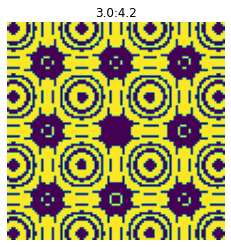

In [62]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io

def find_maxima(scale_space, k_xy=5, k_s=1):
    # Extract the peak x,y locations from scale space
    # Input-    scale_space: Scale space of size HxWxS
    #           k: neighborhood in x and y 
    #           ks: neighborhood in scale
    # Output-   list of (x,y) tuples; x<W and y<H
    
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 

    H,W,S = scale_space.shape
    maxima = []
    for i in range(H):
        for j in range(W):
            for s in range(S):
                # extracts a local neighborhood of max size (2k_xy+1, 2k_xy+1, 2k_s+1)
                neighbors = scale_space[max(0, i-k_xy):min(i+k_xy,H), 
                                        max(0, j-k_xy):min(j+k_xy,W), 
                                        max(0, s-k_s) :min(s+k_s,S)]
                mid_pixel = scale_space[i,j,s]
                num_neighbors = np.prod(neighbors.shape) - 1
                # if mid_pixel is larger than all the neighbors; append maxima 
                if np.sum(mid_pixel > neighbors) == num_neighbors:
                    maxima.append( (i,j,s) )
    return maxima

def visualize_maxima(image, maxima, min_sigma, k, file_path=None):
    # Visualizes the maxima on a given image
    # Input-    image: image of size HxW
    #           maxima: list of (x,y) tuples; x<W, y<H
    #           file_path: path to save image. if None, display to screen
    # Output-   None 
    H, W = image.shape
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for maximum in maxima:
        y,x,s= maximum 
        assert x < W and y < H and x >= 0 and y >= 0
        radius = np.sqrt(2 * min_sigma * (k ** s))
        circ = plt.Circle((x, y), radius, color='r', fill=False)
        ax.add_patch(circ)

    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()

def scale_space(image, min_sigma, k=np.sqrt(2), S=8):
    # Calcualtes a DoG scale space of the image
    # Input-    image: image of size HxW
    #           min_sigma: smallest sigma in scale space
    #           k: scalar multiplier for scale space
    #           S: number of scales considers
    # Output-   Scale Space of size HxWx(S-1)
    gray = color.rgb2gray(image)
    H, W = gray.shape
    k=math.pow(2,1/2)
    sigma_1=min_sigma*math.pow(k,2)
    sigma_2=min_sigma*math.pow(k,1)
    
    kernel_size_1 = int(2 * np.ceil(2*sigma_1) + 1)
    kernel_size_1 = min(kernel_size_1, min(H,W)//2)     
    if kernel_size_1 % 2 == 0: kernel_size_1 = kernel_size_1 + 1

    kernel_size_2 = int(2 * np.ceil(2*sigma_2) + 1) 
    kernel_size_2 = min(kernel_size_2, min(H,W)//2)     
    if kernel_size_2 % 2 == 0: kernel_size_2 = kernel_size_2 + 1

    gauss_1 = gaussian_filter(gray, kernel_size_1, sigma_1)
    gauss_2 = gaussian_filter(gray, kernel_size_1, sigma_2)

    DoG_small = gauss_2 - gauss_1

    maxima = find_maxima(DoG_small, k_xy=int(sigma_1))
    return DoG_small

def visualize_scale_space(scale_space, min_sigma, k, file_path=None):
    # Visualizes the scale space
    # Input-    scale_space: scale space of size HxWxS
    #           min_sigma: the minimum sigma used 
    #           k: the sigma multiplier 
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 
    H, W, S = scale_space.shape
    print(H, W, S)

    # number of subplots
    p_h = int(np.floor(np.sqrt(S))) 
    p_w = int(np.ceil(S/p_h))
    for i in range(S):
        plt.subplot(p_h, p_w, i+1)
        plt.axis('off')
        plt.title('{:.1f}:{:.1f}'.format(min_sigma * k**i, min_sigma * k**(i+1)))
        plt.imshow(scale_space[:, :, i])

    # plot or save to fig 
    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()

image = cv2.imread('/content/sample_data/polka.png')
gray = color.rgb2gray(image)
min_sigma=3
scale_space=scale_space(image, min_sigma, k=np.sqrt(2), S=8)
visualize_scale_space(scale_space, min_sigma, k=np.sqrt(2), file_path='/content/sample_data/scale_space_res.png')
maxima = find_maxima(DoG_small, k_xy=5, k_s=2)
#visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_small.png')


## 3. Blob Detection

In [ ]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io

def find_maxima(scale_space, k_xy=5, k_s=1):
    # Extract the peak x,y locations from scale space
    # Input-    scale_space: Scale space of size HxWxS
    #           k: neighborhood in x and y 
    #           ks: neighborhood in scale
    # Output-   list of (x,y) tuples; x<W and y<H
    print(scale_space)
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 

    H,W,S = scale_space.shape
    maxima = []
    for i in range(H):
        for j in range(W):
            for s in range(S):
                # extracts a local neighborhood of max size (2k_xy+1, 2k_xy+1, 2k_s+1)
                neighbors = scale_space[max(0, i-k_xy):min(i+k_xy,H), 
                                        max(0, j-k_xy):min(j+k_xy,W), 
                                        max(0, s-k_s) :min(s+k_s,S)]
                mid_pixel = scale_space[i,j,s]
                num_neighbors = np.prod(neighbors.shape) - 1
                # if mid_pixel is larger than all the neighbors; append maxima 
                if np.sum(mid_pixel > neighbors) == num_neighbors:
                    maxima.append( (i,j,s) )
    return maxima

def visualize_maxima(image, maxima, min_sigma, k, file_path=None):
    # Visualizes the maxima on a given image
    # Input-    image: image of size HxW
    #           maxima: list of (x,y) tuples; x<W, y<H
    #           file_path: path to save image. if None, display to screen
    # Output-   None 
    print(image.shape)
    H, W, D = image.shape
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for maximum in maxima:
        y,x,s= maximum 
        assert x < W and y < H and x >= 0 and y >= 0
        radius = np.sqrt(2 * min_sigma * (k ** s))
        circ = plt.Circle((x, y), radius, color='r', fill=False)
        ax.add_patch(circ)

    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()

def scale_space(image, min_sigma, k=np.sqrt(2), S=8):
    # Calcualtes a DoG scale space of the image
    # Input-    image: image of size HxW
    #           min_sigma: smallest sigma in scale space
    #           k: scalar multiplier for scale space
    #           S: number of scales considers
    # Output-   Scale Space of size HxWx(S-1)
    gray = color.rgb2gray(image)
    H, W = gray.shape
    k=math.pow(2,1/2)
    sigma_1=min_sigma*math.pow(k,8)
    sigma_2=min_sigma*math.pow(k,7)
    
    kernel_size_1 = int(2 * np.ceil(2*sigma_1) + 1)
    kernel_size_1 = min(kernel_size_1, min(H,W)//2)     
    if kernel_size_1 % 2 == 0: kernel_size_1 = kernel_size_1 + 1
    #print(kernel_size_1)

    kernel_size_2 = int(2 * np.ceil(2*sigma_2) + 1) 
    kernel_size_2 = min(kernel_size_2, min(H,W)//2)     
    if kernel_size_2 % 2 == 0: kernel_size_2 = kernel_size_2 + 1
    #print(kernel_size_2)

    gauss_1 = gaussian_filter(gray, kernel_size_1, sigma_1)
    gauss_2 = gaussian_filter(gray, kernel_size_2, sigma_2)
    print(gauss_1)
    print(gauss_2)
    DoG_small = gauss_2 - gauss_1

    return DoG_small

def visualize_scale_space(scale_space, min_sigma, k, file_path=None):]
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 
    H, W, S = scale_space.shape
    # number of subplots
    p_h = int(np.floor(np.sqrt(S))) 
    p_w = int(np.ceil(S/p_h))
    for i in range(S):
        plt.subplot(p_h, p_w, i+1)
        plt.axis('off')
        plt.title('{:.1f}:{:.1f}'.format(min_sigma * k**i, min_sigma * k**(i+1)))
        plt.imshow(scale_space[:, :, i])

    # plot or save to fig 
    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()

image = cv2.imread('/content/sample_data/polka.png')
gray = color.rgb2gray(image)
min_sigma=3
scale_space=scale_space(image, min_sigma, k=np.sqrt(2), S=8)
#visualize_scale_space(scale_space, min_sigma, k=np.sqrt(2), file_path='/content/sample_data/scale_space_res.png')
print(scale_space)
maxima = find_maxima(scale_space, k_xy=3, k_s=1)
visualize_maxima(image, maxima, 3, 5/3, 'polka_small.png')
print(maxima)

## 4. Cell counting

Detect small polka dots
Detect large polka dots


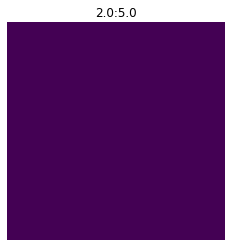

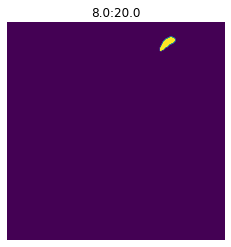

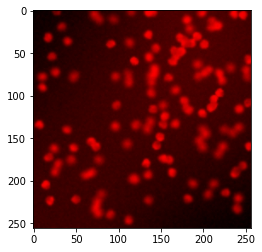

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io

def find_maxima(scale_space, k_xy=5, k_s=1):
    # Extract the peak x,y locations from scale space
    # Input-    scale_space: Scale space of size HxWxS
    #           k: neighborhood in x and y 
    #           ks: neighborhood in scale
    # Output-   list of (x,y) tuples; x<W and y<H
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 

    H,W,S = scale_space.shape
    maxima = []
    for i in range(H):
        for j in range(W):
            for s in range(S):
                # extracts a local neighborhood of max size (2k_xy+1, 2k_xy+1, 2k_s+1)
                neighbors = scale_space[max(0, i-k_xy):min(i+k_xy,H), 
                                        max(0, j-k_xy):min(j+k_xy,W), 
                                        max(0, s-k_s) :min(s+k_s,S)]
                mid_pixel = scale_space[i,j,s]
                num_neighbors = np.prod(neighbors.shape) - 1
                # if mid_pixel is larger than all the neighbors; append maxima 
                if np.sum(mid_pixel > neighbors) == num_neighbors:
                    maxima.append( (i,j,s) )
    return maxima

def visualize_scale_space(scale_space, min_sigma, k, file_path=None):
    # Visualizes the scale space
    # Input-    scale_space: scale space of size HxWxS
    #           min_sigma: the minimum sigma used 
    #           k: the sigma multiplier 
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 
    H, W, S = scale_space.shape

    # number of subplots
    p_h = int(np.floor(np.sqrt(S))) 
    p_w = int(np.ceil(S/p_h))
    for i in range(S):
        plt.subplot(p_h, p_w, i+1)
        plt.axis('off')
        plt.title('{:.1f}:{:.1f}'.format(min_sigma * k**i, min_sigma * k**(i+1)))
        plt.imshow(scale_space[:, :, i])

    # plot or save to fig 
    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()    

def visualize_maxima(image, maxima, min_sigma, k, file_path=None):
    # Visualizes the maxima on a given image
    # Input-    image: image of size HxW
    #           maxima: list of (x,y) tuples; x<W, y<H
    #           file_path: path to save image. if None, display to screen
    # Output-   None 
    gray = color.rgb2gray(image)
    H, W = gray.shape
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for maximum in maxima:
        y,x,s= maximum 
        radius = np.sqrt(2 * min_sigma * (k ** s))
        circ = plt.Circle((x, y), radius, color='r', fill=False)
        ax.add_patch(circ)

    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()    


def main():
    image = cv2.imread('/content/sample_data/001cell.png')
    gray = color.rgb2gray(image)
    ### -- Detecting Polka Dots -- ## 
    print("Detect small polka dots")
    # -- Detect Small Circles
    H, W = gray.shape
    # -- good heuristic way of setting kernel size 
    sigma_1, sigma_2 = 2,5
    kernel_size_1 = int(2 * np.ceil(2*sigma_1) + 1)
    # make sure that kernel size isn't too big and is odd 
    kernel_size_1 = min(kernel_size_1, min(H,W)//2)     
    if kernel_size_1 % 2 == 0: kernel_size_1 = kernel_size_1 + 1

    gauss_1 = gaussian_filter(gray, kernel_size_1, sigma_1)
    gauss_2 = gaussian_filter(gray, kernel_size_1, sigma_2)

    # calculate difference of gaussians
    DoG_small = gauss_2 - gauss_1

    # visualize maxima 
    maxima = find_maxima(DoG_small, k_xy=int(sigma_1))
    visualize_scale_space(DoG_small, sigma_1, sigma_2/sigma_1,'polka_small_DoG.png')
    visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_small.png')
    
    # -- Detect Large Circles
    print("Detect large polka dots")
    sigma_1, sigma_2 = 8,20
    kernel_size_1 = int(2 * np.ceil(2*sigma_1) + 1)
    # make sure that kernel size isn't too big and is odd 
    kernel_size_1 = min(kernel_size_1, min(H,W)//2)     
    if kernel_size_1 % 2 == 0: kernel_size_1 = kernel_size_1 + 1

    gauss_1 = gaussian_filter(gray, kernel_size_1, sigma_1)
    gauss_2 = gaussian_filter(gray, kernel_size_1, sigma_2)

    # calculate difference of gaussians 
    DoG_large = gauss_2 - gauss_1
    
    # visualize maxima 
    # Value of k_xy is a sugguestion; feel free to change it as you wish.
    maxima = find_maxima(DoG_large, k_xy=10)
    visualize_scale_space(DoG_large, sigma_1, sigma_2/sigma_1, 'polka_large_DoG.png')
    visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_large.png')
main()

In [63]:
import numpy as np
import cv2
import os

img = cv2.imread('/content/sample_data/001cell.png', 0)
denoisedImg = cv2.fastNlMeansDenoising(img)
th, threshedImg = cv2.threshold(denoisedImg, 200, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) # src, thresh, maxval, type
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
cv2.imwrite('/content/sample_data/kernel.png',kernel)
morphImg = cv2.morphologyEx(threshedImg, cv2.MORPH_OPEN, kernel)
cv2.imwrite('/content/sample_data/morph.png',morphImg)
contours, hierarchy = cv2.findContours(morphImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contoursImg = cv2.cvtColor(morphImg, cv2.COLOR_GRAY2RGB)
cv2.drawContours(contoursImg, contours, -1, (255,100,0), 3)
cv2.imwrite('/content/sample_data/res.png',contoursImg)



True